Overview

The data has been split into two groups:

training set (train.csv)
test set (test.csv)
The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

Data Dictionary

Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import random 


In [2]:
data = pd.read_csv('train.csv')
test_data_from_kaggle = pd.read_csv('test.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1]:
mapping = {
    'S': 0,
    'C': 1,
    'Q': 2
}
def mymap(x):
    try:
        return mapping[x]
    except:
        return -1

In [2]:
mymap('F')

-1

In [6]:
# data['sex_id'] = [1 if i == 'male' else 0 for i in data['Sex']]

#embarked_id_list = []
# for i in data['Embarked']:
#     if i == 'S':
#         embarked_id_list.append(0)
#     elif i == 'C':
#         embarked_id_list.append(1)
#     else:
#         embarked_id_list.append(2)
# data['embarked_id'] = embarked_id_list

data['sex_id'] = (data['Sex'] == 'male').astype('int')

# mapping = [('S', 0), ('C', 1)]
mapping = {
    'S': 0,
    'C': 1,
    'Q': 2
}
def mymap(x):
    try:
        return mapping[x]
    except:
        return -1

data['embarked_id'] = data['Embarked'].apply(mymap)
data['is_train'] = np.random.uniform(0, 1, len(data)) <= .75

In [7]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_id,embarked_id,is_train
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,True
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1,2,True
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,0,True
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1,0,True
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0,0,True
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0,1,False


In [8]:
train_data = data[data['is_train']][['Survived', 'Pclass', 'sex_id', 'Age', 'SibSp', 'Parch', 'Fare', 'embarked_id']]
test_data = data[~data['is_train']][['Survived', 'Pclass', 'sex_id', 'Age', 'SibSp', 'Parch', 'Fare', 'embarked_id']]

In [9]:
print(train_data.shape)
print(test_data.shape)

(660, 8)
(231, 8)


In [10]:
#droping null age values
train_data = train_data.dropna(subset=['Age'])
test_data = test_data.dropna(subset=['Age'])
# train_data['Age'] = train_data['Age'].fillna('null')
# test_data['Age'] = test_data['Age'].fillna('null')
# train_data = train_data[train_data['Age'] != 'null']
# test_data = test_data[test_data['Age'] != 'null']

In [11]:
train_data[train_data['Survived'] == 0].describe()

,Survived,Pclass,sex_id,Age,SibSp,Parch,Fare,embarked_id
count,321.0,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000
mean,0.0,2.457944,0.853583,30.512461,0.548287,0.389408,24.121805,0.205607
std,0.0,0.757633,0.354076,14.118245,1.091876,0.908852,33.762113,0.495069
min,0.0,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,2.000000,1.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,0.0,3.000000,1.000000,28.000000,0.000000,0.000000,13.000000,0.000000
75%,0.0,3.000000,1.000000,39.000000,1.000000,0.000000,26.550000,0.000000
max,0.0,3.000000,1.000000,74.000000,5.000000,6.000000,263.000000,2.000000


In [12]:
age_surv_df.head()

NameError: name 'age_surv_df' is not defined

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1116a85f8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1117ec5c0>], dtype=object)

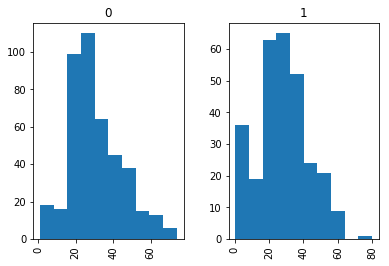

In [14]:
%matplotlib inline
data.hist(column='Age', by='Survived')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11187ed30>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11190c0b8>], dtype=object)

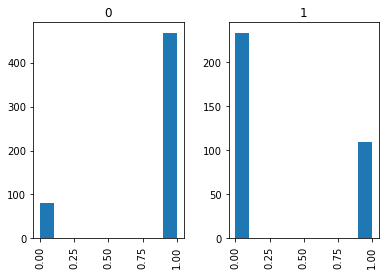

In [15]:
data.hist(column='sex_id', by='Survived')

In [15]:

# %matplotlib inline
# # train_data[train_data['Survived'] == 0]['Age'].plot(kind='hist')

# age_surv_df = pd.DataFrame({'survived': data[data['Survived'] == 1]['Age'], 'died': data[data['Survived'] == 0]['Age']})
# age_surv_df[['died', 'survived']].plot(kind='hist', subplots=True, sharey=True, figsize=(8, 8), grid=True)

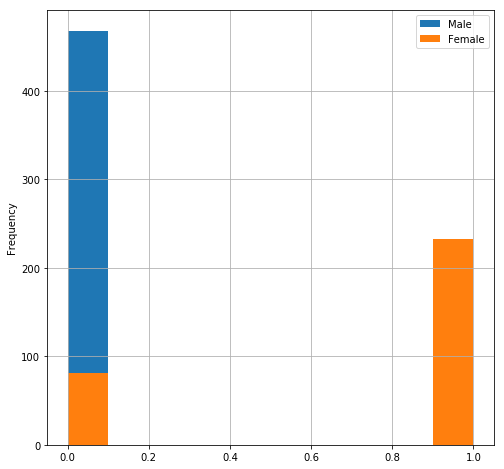

In [16]:
sex_surv_df = pd.DataFrame({'Male': data[data['Sex'] == 'male']['Survived'], 'Female': data[data['Sex'] == 'female']['Survived']})
sex_surv_df[['Male', 'Female']].plot(kind='hist', figsize=(8, 8), grid=True)

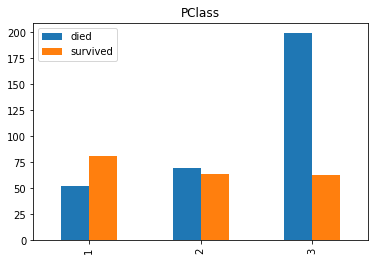

In [17]:
#Pclass
# train_data[train_data['Survived'] == 0]['Pclass'].plot(kind='hist')
pclass_ns = train_data[train_data['Survived'] == 0]['Pclass'].value_counts()
pclass_s = train_data[train_data['Survived'] == 1]['Pclass'].value_counts()
pclass_df = pd.DataFrame({'survived': pclass_s, 'died': pclass_ns})
pclass_df.plot(kind='bar', title='PClass')

In [18]:
train_data[train_data['Survived'] == 1].describe()

,Survived,Pclass,sex_id,Age,SibSp,Parch,Fare,embarked_id
count,208.0,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,1.0,1.913462,0.322115,28.571298,0.514423,0.490385,50.960117,0.322115
std,0.0,0.829534,0.468414,14.623730,0.773838,0.767645,75.523916,0.526672
min,1.0,1.000000,0.000000,0.750000,0.000000,0.000000,0.000000,0.000000
25%,1.0,1.000000,0.000000,20.000000,0.000000,0.000000,12.868750,0.000000
50%,1.0,2.000000,0.000000,28.000000,0.000000,0.000000,26.000000,0.000000
75%,1.0,3.000000,1.000000,36.000000,1.000000,1.000000,58.334400,1.000000
max,1.0,3.000000,1.000000,80.000000,4.000000,3.000000,512.329200,2.000000


In [19]:
# %matplotlib inline
# train_data['Survived'].value_counts().plot(kind='pie')
# train_data.plot(kind='scatter', x='Age', y='Survived')
# train_data.plot(kind='scatter', x='Fare', y='Survived')
# train_data.plot(kind='scatter', x='Age', y='Fare', c='Survived', cmap=plt.cm.binary)

In [20]:
# fig, ax = plt.subplots()
# ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
# for name, group in groups:
#     ax.plot(group.Age, group.Fare, marker='o', linestyle='', ms=4, label=name)
# ax.legend()
# plt.show()

In [21]:
# scatter_matrix(train_data[['Age','Fare', 'Survived','sex_id']], alpha=0.2, figsize=(6, 6), diagonal='kde')

In [22]:
# train_data.Fare.plot(kind='hist')

In [23]:
'Survived ~ Pclass + C(sex_id) + Age + Age*Age'

'Survived ~ Pclass + C(sex_id) + Age + Age*Age'

In [21]:
X = train_data[['Pclass', 'sex_id', 'Age', 'SibSp', 'Parch', 'Fare', 'embarked_id']]
y = train_data['Survived']
clf = RandomForestClassifier(max_depth=3, random_state=0)
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [22]:
clf.predict(train_data[['Pclass', 'sex_id', 'Age', 'SibSp', 'Parch', 'Fare', 'embarked_id']])

array([0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1,

In [23]:
i = 40
pred_thrsh = (clf.predict_proba(train_data[['Pclass', 'sex_id', 'Age', 'SibSp', 'Parch', 'Fare', 'embarked_id']]) >= (i/100)).astype('int')


In [24]:
pred_thrsh[0: 3]

array([[1, 0],
       [0, 1],
       [0, 1]])

In [25]:
predicted_survival_train = clf.predict(train_data[['Pclass', 'sex_id', 'Age', 'SibSp', 'Parch', 'Fare', 'embarked_id']])
con_matx_train = pd.crosstab(train_data['Survived'], predicted_survival_train, rownames=['Actual Survived'], colnames=['Predicted Survival'])
accuracy_percent_train = (con_matx_train.iloc[0, 0] + con_matx_train.iloc[1, 1])/(con_matx_train[0].sum() + con_matx_train[1].sum())
print(accuracy_percent_train)
con_matx_train

0.824196597353


Predicted Survival,0,1
Actual Survived,,
0,308,13
1,80,128


In [26]:
1/100

0.01

In [27]:
predicted_survival = clf.predict(test_data[['Pclass', 'sex_id', 'Age', 'SibSp', 'Parch', 'Fare', 'embarked_id']])
con_matx = pd.crosstab(test_data['Survived'], predicted_survival, rownames=['Actual Survived'], colnames=['Predicted Survival'])
accuracy_percent = (con_matx.iloc[0, 0] + con_matx.iloc[1, 1])/(con_matx[0].sum() + con_matx[1].sum())
print(accuracy_percent)
con_matx

0.832432432432


Predicted Survival,0,1
Actual Survived,,
0,100,3
1,28,54


In [28]:
feat = pd.DataFrame({'Feature': ['Pclass', 'sex_id', 'Age', 'SibSp', 'Parch', 'Fare', 'embarked_id'],'importance':  clf.feature_importances_})
feat

,Feature,importance
0,Pclass,0.191919
1,sex_id,0.381901
2,Age,0.104624
3,SibSp,0.042203
4,Parch,0.082168
5,Fare,0.164411
6,embarked_id,0.032773


In [29]:
# for i in ['Pclass', 'sex_id', 'Age', 'SibSp', 'Parch', 'Fare', 'embarked_id']:
#     print(train_data[i])
    
import itertools
subset_list = []
features = ['Pclass', 'sex_id', 'Age', 'SibSp', 'Parch', 'Fare', 'embarked_id']
for L in range(0, len(features)+1):
  for subset in itertools.combinations(features, L):
    subset_list.append(list(subset))

In [171]:
feature_list = []
training_confusion_matrix_accuracy = []
test_confusion_matrix_accuracy = []
feature_list = []
feature_importance_list = []
auc_score_list_t = []
auc_score_list_train = []
max_decision_tree_depth=None

def train_the_data(list_):
    clf = RandomForestClassifier(max_depth=max_decision_tree_depth, random_state=0)
    clf.fit(train_data[list_], train_data['Survived'])
    predicted_survival_train = clf.predict(train_data[list_])
    auc_score_train = calculate_auc_score((clf.predict_proba(train_data[list_])), 1)
#     print(auc_score)
    con_matx_train = pd.crosstab(train_data['Survived'], predicted_survival_train, rownames=['Actual Survived'], colnames=['Predicted Survival'])
    accuracy_percent_train = (con_matx_train.iloc[0, 0] + con_matx_train.iloc[1, 1])/(con_matx_train[0].sum() + con_matx_train[1].sum())
#     print(accuracy_percent_train)

    return accuracy_percent_train, auc_score_train/100

def test_the_data(list_):
    clf = RandomForestClassifier(max_depth=max_decision_tree_depth, random_state=0)
    clf.fit(test_data[list_], test_data['Survived'])
    predicted_survival = clf.predict(test_data[list_])
    auc_score_test = calculate_auc_score((clf.predict_proba(test_data[list_])), 0)
    con_matx_test = pd.crosstab(test_data['Survived'], predicted_survival, rownames=['Actual Survived'], colnames=['Predicted Survival'])
    accuracy_percent_test = (con_matx_test.iloc[0, 0] + con_matx_test.iloc[1, 1])/(con_matx_test[0].sum() + con_matx_test[1].sum())
#     print(accuracy_percent)
    return accuracy_percent_test, auc_score_test/100

def calculate_auc_score(prob_scores, train_or_test):
    train_data.index = range(len(train_data))

    # true positive rate = true positives/all positives
    # false positive rate = false positives/all negatives
    
    if train_or_test == 1: #train = 1 test = 0
        train_data.index = range(len(train_data))
        all_positives = train_data['Survived'].sum()
        all_negatives = len(train_data) - train_data['Survived'].sum()
        test_or_train_data = train_data
    else:
        test_data.index = range(len(test_data))
        all_positives = test_data['Survived'].sum()
        all_negatives = len(test_data) - test_data['Survived'].sum()
        test_or_train_data = test_data
        
    true_positive_rate_list = []
    false_positive_rate_list = []
    for i in range(1,100):
        pred_val = (prob_scores.T[1] > i*.01).astype('int')
        true_positive_count = 0
        false_positive_count = 0

        for j in range(len(pred_val)):
            if pred_val[j] == 1 and test_or_train_data.loc[j, 'Survived']==1:
                true_positive_count += 1
            elif pred_val[j] == 1 and test_or_train_data.loc[j, 'Survived'] == 0:
                false_positive_count +=1

        true_positive_rate_list.append(true_positive_count/all_positives)

        false_positive_rate_list.append(false_positive_count/all_negatives)

    return sum(true_positive_rate_list)
#     roc_df = pd.DataFrame({'tpr': true_positive_rate_list, 'fpr': false_positive_rate_list})

                                    
for i in subset_list[8:]:
    feature_list.append(i)
    #train
    training_result = train_the_data(i)
    auc_score_list_train.append(training_result[1])
    training_confusion_matrix_accuracy.append(training_result[0])
    #test
    testing_result = test_the_data(i)
    auc_score_list_test.append(testing_result[1])    
    test_confusion_matrix_accuracy.append(testing_result[0])
                                  
df = pd.DataFrame({'training_auc_scores': auc_score_list_train, 'testing_auc_scores': auc_score_list_test, 'train accuracy': training_confusion_matrix_accuracy, 'test accuracy': test_confusion_matrix_accuracy, 'list': feature_list })
df['num_of_features'] = [len(line) for line in df['list']]

In [174]:
df.sort_values('training_auc_scores', ascending=False)

,list,test accuracy,testing_auc_scores,train accuracy,training_auc_scores,num_of_features
58,"[Pclass, sex_id, Age, Fare]",0.989189,0.906098,0.965974,0.875865,4
112,"[Pclass, sex_id, Age, SibSp, Parch, Fare]",0.989189,0.888293,0.967864,0.863894,6
119,"[Pclass, sex_id, Age, SibSp, Parch, Fare, emba...",0.994595,0.888537,0.967864,0.863029,7
94,"[Pclass, sex_id, Age, Parch, Fare]",0.989189,0.896341,0.958412,0.862644,5
106,"[sex_id, Age, SibSp, Parch, Fare]",0.978378,0.883902,0.969754,0.862356,5
96,"[Pclass, sex_id, Age, Fare, embarked_id]",0.989189,0.888537,0.964083,0.860962,5
115,"[Pclass, sex_id, Age, Parch, Fare, embarked_id]",0.994595,0.888537,0.969754,0.860721,6
114,"[Pclass, sex_id, Age, SibSp, Fare, embarked_id]",0.983784,0.893171,0.967864,0.857644,6
92,"[Pclass, sex_id, Age, SibSp, Fare]",0.983784,0.894878,0.964083,0.856923,5
108,"[sex_id, Age, SibSp, Fare, embarked_id]",0.989189,0.891951,0.971645,0.853558,5


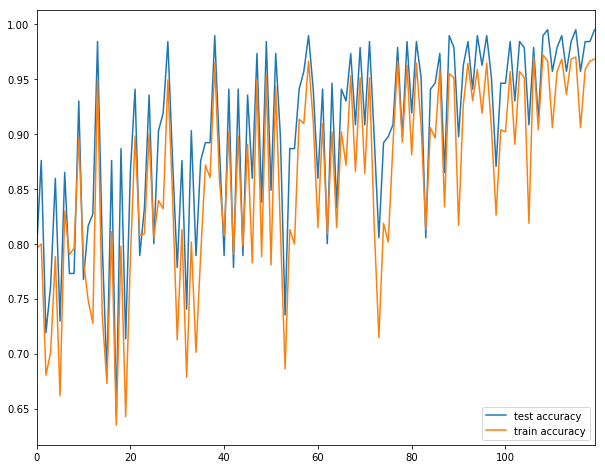

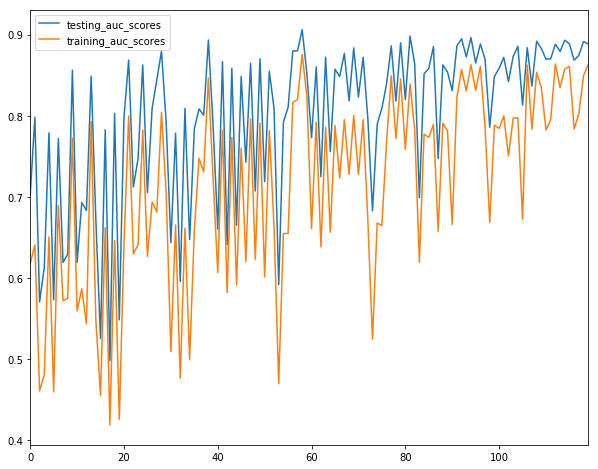

In [178]:
%matplotlib inline
df[['list', 'test accuracy', 'train accuracy']].plot(kind='line', figsize=(10, 8) )
df[['list', 'testing_auc_scores', 'training_auc_scores']].plot(kind='line', figsize=(10, 8) )

In [34]:
df.sort_values('test accuracy', ascending = False).head(10)

,list,test accuracy,train accuracy,num_of_features
112,"[Pclass, sex_id, Age, SibSp, Parch, Fare]",0.983146,0.977612,6
38,"[sex_id, Age, Fare]",0.977528,0.972015,3
118,"[sex_id, Age, SibSp, Parch, Fare, embarked_id]",0.977528,0.970149,6
92,"[Pclass, sex_id, Age, SibSp, Fare]",0.971910,0.975746,5
104,"[Pclass, Age, Parch, Fare, embarked_id]",0.971910,0.953358,5
49,"[Age, Parch, Fare]",0.971910,0.955224,3
58,"[Pclass, sex_id, Age, Fare]",0.971910,0.972015,4
108,"[sex_id, Age, SibSp, Fare, embarked_id]",0.971910,0.970149,5
67,"[Pclass, Age, SibSp, Fare]",0.971910,0.960821,4
119,"[Pclass, sex_id, Age, SibSp, Parch, Fare, emba...",0.971910,0.977612,7


In [34]:
subset_list

[[],
 ['Pclass'],
 ['sex_id'],
 ['Age'],
 ['SibSp'],
 ['Parch'],
 ['Fare'],
 ['embarked_id'],
 ['Pclass', 'sex_id'],
 ['Pclass', 'Age'],
 ['Pclass', 'SibSp'],
 ['Pclass', 'Parch'],
 ['Pclass', 'Fare'],
 ['Pclass', 'embarked_id'],
 ['sex_id', 'Age'],
 ['sex_id', 'SibSp'],
 ['sex_id', 'Parch'],
 ['sex_id', 'Fare'],
 ['sex_id', 'embarked_id'],
 ['Age', 'SibSp'],
 ['Age', 'Parch'],
 ['Age', 'Fare'],
 ['Age', 'embarked_id'],
 ['SibSp', 'Parch'],
 ['SibSp', 'Fare'],
 ['SibSp', 'embarked_id'],
 ['Parch', 'Fare'],
 ['Parch', 'embarked_id'],
 ['Fare', 'embarked_id'],
 ['Pclass', 'sex_id', 'Age'],
 ['Pclass', 'sex_id', 'SibSp'],
 ['Pclass', 'sex_id', 'Parch'],
 ['Pclass', 'sex_id', 'Fare'],
 ['Pclass', 'sex_id', 'embarked_id'],
 ['Pclass', 'Age', 'SibSp'],
 ['Pclass', 'Age', 'Parch'],
 ['Pclass', 'Age', 'Fare'],
 ['Pclass', 'Age', 'embarked_id'],
 ['Pclass', 'SibSp', 'Parch'],
 ['Pclass', 'SibSp', 'Fare'],
 ['Pclass', 'SibSp', 'embarked_id'],
 ['Pclass', 'Parch', 'Fare'],
 ['Pclass', 'Parch', 'e

In [176]:
will = clf.predict_proba(train_data[['Pclass', 'sex_id', 'Age', 'SibSp', 'Parch', 'Fare', 'embarked_id']])

In [186]:
%%time
train_data.index = range(len(train_data))

# true positive rate = true positives/all positives
# false positive rate = false positives/all negatives

all_positives = train_data['Survived'].sum()
all_negatives = len(train_data) - train_data['Survived'].sum()
true_positive_rate_list = []
false_positive_rate_list = []
for i in range(1,100):
    pred_val = (will.T[1] > i*.01).astype('int')
    true_positive_count = 0
    false_positive_count = 0
    for j in range(len(pred_val)):
        if pred_val[j] == 1 and train_data.loc[j, 'Survived']==1:
            true_positive_count += 1
        elif pred_val[j] == 1 and train_data.loc[j, 'Survived'] == 0:
            false_positive_count +=1

    true_positive_rate_list.append(true_positive_count/all_positives)  
    false_positive_rate_list.append(false_positive_count/all_negatives)
AUC = sum(true_positive_rate_list)
#     print(true_positive_rate)
#     print(false_positive_rate)
roc_df = pd.DataFrame({'tpr': true_positive_rate_list, 'fpr': false_positive_rate_list})

CPU times: user 378 ms, sys: 4.66 ms, total: 383 ms
Wall time: 384 ms


In [206]:
will

array([[ 0.81156014,  0.18843986],
       [ 0.146177  ,  0.853823  ],
       [ 0.22300183,  0.77699817],
       ..., 
       [ 0.70873187,  0.29126813],
       [ 0.64058191,  0.35941809],
       [ 0.81584093,  0.18415907]])

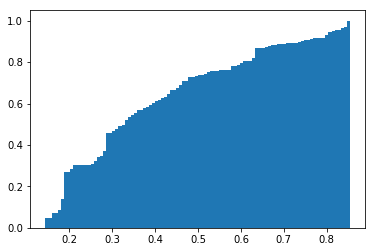

In [209]:
plt.hist(will[:,1], bins=100, cumulative=True, normed=True);

In [187]:
AUC

55.533653846153875

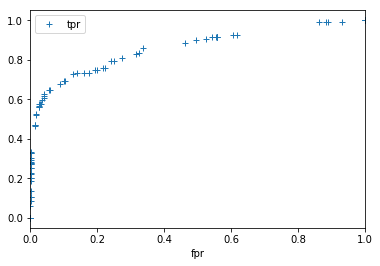

In [189]:
roc_df[::-1].plot(kind='line', x='fpr', style='+')

In [198]:
dfpr = roc_df.fpr - roc_df.fpr.shift(-1)

In [212]:
(0.5*(roc_df.tpr + roc_df.tpr.shift(-1))*dfpr).sum()

0.8624715432542536

In [119]:
sum(true_positive_rate_list)/100

0.5553365384615387